In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.interpolate
#from sklearn.utils import shuffle
import matplotlib.pyplot as plt

def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise


### データ全体の生成

[  1.62591048e-02   8.60558580e-02   1.04992509e-01   2.08587226e-01
   2.54182112e-01   3.39090095e-01   3.44494062e-01   4.05714301e-01
   4.69385596e-01   5.19895390e-01   5.59308482e-01   6.17453513e-01
   6.59535654e-01   7.28291244e-01   7.79251944e-01   7.64176744e-01
   8.46263674e-01   8.47984335e-01   9.46178592e-01   9.32462215e-01
   9.08167201e-01   9.80870873e-01   1.02878993e+00   9.71702283e-01
   1.02283923e+00   1.02211387e+00   1.04322104e+00   9.82897504e-01
   9.40100535e-01   9.61424093e-01   9.31986036e-01   9.42907052e-01
   9.47659024e-01   8.53710028e-01   8.73201871e-01   7.70244354e-01
   7.94037729e-01   6.82897065e-01   6.90551134e-01   6.02977543e-01
   5.49020620e-01   5.20276126e-01   5.07764386e-01   4.60719881e-01
   3.54843244e-01   2.95982256e-01   2.33473168e-01   1.41376051e-01
   1.08531907e-01   3.84450947e-02  -2.03560148e-02  -9.41842163e-02
  -1.43772263e-01  -1.42619201e-01  -2.91058123e-01  -3.58006713e-01
  -4.11927674e-01  -3.94438496e-01

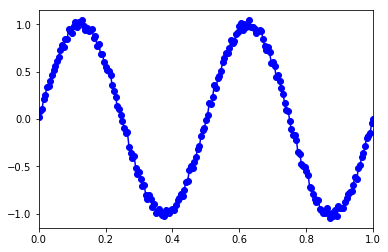

In [14]:
T = 100
f = toy_problem(T)
print(f)


# プロット＋曲線を引く
# 参考URL： https://blog.monophile.net/posts/20131014_matplotlib_interpolate.html
# scipy install: https://anaconda.org/anaconda/scipy
num = len(f)
start, end = 0, 1
x = np.linspace(start,end,num)
y = f
import scipy.interpolate
sp = scipy.interpolate.InterpolatedUnivariateSpline(x,y)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(start,end)

sx = np.linspace(start,end,1000)
sy = sp(sx)
ax.plot(x,y,"bo")
ax.plot(sx,sy,"b")

### 全体データから、一定の長さでズラシながら抽出してデータセットを作る

```
(全体データ)
2.541 3.3909  3.4449  4.0571  4.6938  5.1989  5.5930 6.17453
　↓
(t時点)data    　　 　target
2.541 3.3909  3.4449→4.0571
(t+1時点) data           　　 　target
      3.3909  3.4449  4.0571→  4.6938
```

In [18]:
# 全データの長さ
length_of_sequence = 2 * T
# 1つの時系列データの長さ
maxlen = 25

data = []
target = []

for i in range(0, length_of_sequence - maxlen + 1):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])

print(data[0:3])
print(target[0:3])

[array([ 0.0162591 ,  0.08605586,  0.10499251,  0.20858723,  0.25418211,
        0.3390901 ,  0.34449406,  0.4057143 ,  0.4693856 ,  0.51989539,
        0.55930848,  0.61745351,  0.65953565,  0.72829124,  0.77925194,
        0.76417674,  0.84626367,  0.84798433,  0.94617859,  0.93246222,
        0.9081672 ,  0.98087087,  1.02878993,  0.97170228,  1.02283923]), array([ 0.08605586,  0.10499251,  0.20858723,  0.25418211,  0.3390901 ,
        0.34449406,  0.4057143 ,  0.4693856 ,  0.51989539,  0.55930848,
        0.61745351,  0.65953565,  0.72829124,  0.77925194,  0.76417674,
        0.84626367,  0.84798433,  0.94617859,  0.93246222,  0.9081672 ,
        0.98087087,  1.02878993,  0.97170228,  1.02283923,  1.02211387]), array([ 0.10499251,  0.20858723,  0.25418211,  0.3390901 ,  0.34449406,
        0.4057143 ,  0.4693856 ,  0.51989539,  0.55930848,  0.61745351,
        0.65953565,  0.72829124,  0.77925194,  0.76417674,  0.84626367,
        0.84798433,  0.94617859,  0.93246222,  0.9081672 , 